In [1]:
import numpy as np 
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import pandas_datareader.data as web
from datetime import datetime

In [285]:
print(df.head())
start_time

            Adj Close  Prediction
Date                             
2012-01-10  52.608791   64.187332
2012-01-11  52.523026   64.935638
2012-01-12  52.378838   65.352058
2012-01-13  52.182446   66.551537
2012-01-17  52.790268   67.425362


datetime.datetime(2012, 1, 10, 0, 0)

now_time = datetime.now()
start_time = datetime(now_time.year - 20, now_time.month , now_time.day)
now_time
start_time


In [2]:
now_time = datetime.now()
start_time = datetime(now_time.year - 25, now_time.month , now_time.day)
now_time
start_time

datetime.datetime(1995, 1, 11, 0, 0)

In [3]:
stock_df = web.DataReader('AAPL','yahoo', start_time, now_time)

In [4]:
start_time = datetime(now_time.year - 5, now_time.month , now_time.day)

sp_df=web.DataReader('^GSPC','yahoo', start_time, now_time)    

In [5]:
sp_df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-06,3246.840088,3214.639893,3217.550049,3246.280029,3674070000,3246.280029
2020-01-07,3244.909912,3232.429932,3241.860107,3237.179932,3420380000,3237.179932
2020-01-08,3267.070068,3236.669922,3238.590088,3253.050049,3720890000,3253.050049
2020-01-09,3275.580078,3263.669922,3266.030029,3274.699951,3638390000,3274.699951
2020-01-10,3282.989990,3260.860107,3281.810059,3265.350098,1631680402,3265.350098


In [6]:
stock_df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-06,299.959991,292.750000,293.790009,299.799988,29596800.0,299.799988
2020-01-07,300.899994,297.480011,299.839996,298.390015,27218000.0,298.390015
2020-01-08,304.440002,297.160004,297.160004,303.190002,33019800.0,303.190002
2020-01-09,310.429993,306.200012,307.239990,309.630005,42527100.0,309.630005
2020-01-10,312.670013,308.250000,310.600006,310.329987,35217272.0,310.329987


In [7]:
# Get the Adjusted Close Price

df = stock_df[['Adj Close']]
#Take a look at the new data
df.head() 

#df.to_csv('data_stocks.csv')

,Adj Close
Date,
1995-01-11,1.436337
1995-01-12,1.394092
1995-01-13,1.378730
1995-01-16,1.367209
1995-01-17,1.382571


In [8]:
df.tail() 

,Adj Close
Date,
2020-01-06,299.799988
2020-01-07,298.390015
2020-01-08,303.190002
2020-01-09,309.630005
2020-01-10,310.329987


In [9]:
# A variable for predicting 'n' days out into the future
forecast_out = 30 #'n=30' days
#Create another column (the target or dependent variable) shifted 'n' units up
#df['InitialPrediction'] = df[['Adj Close']].shift()
df['Prediction'] = df[['Adj Close']].shift(-forecast_out)
#print the new data set
df.tail() 

/Users/Shiva/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Adj Close,Prediction
Date,,
2020-01-06,299.799988,NaN
2020-01-07,298.390015,NaN
2020-01-08,303.190002,NaN
2020-01-09,309.630005,NaN
2020-01-10,310.329987,NaN


In [10]:
df.tail()

,Adj Close,Prediction
Date,,
2020-01-06,299.799988,NaN
2020-01-07,298.390015,NaN
2020-01-08,303.190002,NaN
2020-01-09,309.630005,NaN
2020-01-10,310.329987,NaN


In [11]:
### Create the independent data set (X)  #######
# Convert the dataframe to a numpy array
X = np.array(df.drop(['Prediction'],1))

#Remove the last 'n' rows
X = X[:-forecast_out]
print(X)

[[  1.43633747]
 [  1.39409244]
 [  1.37873042]
 ...
 [261.77999878]
 [266.36999512]
 [264.29000854]]


In [12]:
df.head()

,Adj Close,Prediction
Date,,
1995-01-11,1.436337,1.238112
1995-01-12,1.394092,1.201527
1995-01-13,1.378730,1.178421
1995-01-16,1.367209,1.216931
1995-01-17,1.382571,1.232336


In [13]:
df.tail()

,Adj Close,Prediction
Date,,
2020-01-06,299.799988,NaN
2020-01-07,298.390015,NaN
2020-01-08,303.190002,NaN
2020-01-09,309.630005,NaN
2020-01-10,310.329987,NaN


In [14]:
## Create the dependent data set (y)  #####
# Convert the dataframe to a numpy array (All of the values including the NaN's)
y = np.array(df['Prediction'])
# Get all of the y values except the last 'n' rows
y = y[:-forecast_out]
print(y[:-forecast_out])




[  1.23811162   1.20152676   1.17842102 ... 261.77999878 266.36999512
 264.29000854]


In [15]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [16]:
# Create and train the Support Vector Machine (Regressor)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [17]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
svm_confidence = svr_rbf.score(x_test, y_test)
print("svm confidence: ", svm_confidence)

svm confidence:  0.9842731457302454


In [18]:
# Create and train the Linear Regression  Model
lr = LinearRegression()
# Train the model
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
lr_confidence = lr.score(x_test, y_test)
print("lr confidence: ", lr_confidence)


lr confidence:  0.9856669395292008


In [21]:
# Set x_forecast equal to the last 30 rows of the original data set from Adj. Close column
x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]
print(x_forecast) 

[[267.83999634]
 [267.25      ]
 [264.16000366]
 [259.45001221]
 [261.73999023]
 [265.57998657]
 [270.70999146]
 [266.92001343]
 [268.48001099]
 [270.76998901]
 [271.45999146]
 [275.1499939 ]
 [279.85998535]
 [280.41000366]
 [279.73999023]
 [280.01998901]
 [279.44000244]
 [284.        ]
 [284.26998901]
 [289.91000366]
 [289.79998779]
 [291.51998901]
 [293.6499939 ]
 [300.3500061 ]
 [297.42999268]
 [299.79998779]
 [298.39001465]
 [303.19000244]
 [309.63000488]
 [310.32998657]]


# Set x_forecast equal to the last 30 rows of the original data set from Adj. Close column
#x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]
x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]
print(x_forecast[0])

In [22]:
# Print linear regression model predictions for the next 'n' days
lr_prediction = lr.predict(x_forecast)
print(lr_prediction)
lr_pdf=pd.DataFrame(lr_prediction)
lr_pdf

[277.07673298 276.4662194  273.2687678  268.39498541 270.7645979
 274.73813091 280.04653278 276.12475748 277.73900427 280.10861676
 280.82261418 284.64093722 289.51471961 290.08386492 289.39055164
 289.68028743 289.08013171 293.79870413 294.07808206 299.91422939
 299.8003877  301.58020232 303.78427856 310.71728509 307.69572759
 310.14813977 308.68913452 313.65604289 320.31999775 321.04432145]


,0
0,277.076733
1,276.466219
2,273.268768
3,268.394985
4,270.764598
5,274.738131
6,280.046533
7,276.124757
8,277.739004
9,280.108617


In [23]:
df.tail()

,Adj Close,Prediction
Date,,
2020-01-06,299.799988,NaN
2020-01-07,298.390015,NaN
2020-01-08,303.190002,NaN
2020-01-09,309.630005,NaN
2020-01-10,310.329987,NaN


In [24]:
df.tail()

,Adj Close,Prediction
Date,,
2020-01-06,299.799988,NaN
2020-01-07,298.390015,NaN
2020-01-08,303.190002,NaN
2020-01-09,309.630005,NaN
2020-01-10,310.329987,NaN


In [25]:
df.tail()

,Adj Close,Prediction
Date,,
2020-01-06,299.799988,NaN
2020-01-07,298.390015,NaN
2020-01-08,303.190002,NaN
2020-01-09,309.630005,NaN
2020-01-10,310.329987,NaN


In [27]:
#Error 
from sklearn.metrics import mean_squared_error,r2_score
#df['InitialPrediction'] = df[['Adj Close']].shift()
Y_orginal= np.array(df.drop(['Prediction'],1))
Y_true=Y_orginal[-30:]
Y_pred=lr_prediction
#mean_squared_error(Y_orginal[-30:], lr_prediction)
MSE = np.square(np.subtract(Y_true,Y_pred)).mean() 
MSE 

rmse=r2_score(Y_true, Y_pred)
rmse

0.5481661596019146

In [28]:
# Print support vector regressor model predictions for the next 'n' days
svm_prediction = svr_rbf.predict(x_forecast)
print(svm_prediction) 

[330.48242401 328.42460548 292.84635692 279.26239571 286.83335969
 291.92896417 205.61995696 322.54795428 317.50654043 202.87587454
 176.36012677 141.13894039 140.84073777 140.84072989 140.84074159
 140.84073423 140.84075822 140.84072762 140.84072762 140.84072762
 140.84072762 140.84072762 140.84072762 140.84072762 140.84072762
 140.84072762 140.84072762 140.84072762 140.84072762 140.84072762]


In [29]:
dt=datetime.today().strftime('%Y-%m-%d')

df.tail(30) 
new_df= df.tail(30) 
new_df['Prediction']=lr_prediction

/Users/Shiva/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [33]:
new_df.head()


,Adj Close,Prediction
Date,,
2019-11-27,267.839996,277.076733
2019-11-29,267.250000,276.466219
2019-12-02,264.160004,273.268768
2019-12-03,259.450012,268.394985
2019-12-04,261.739990,270.764598


([<matplotlib.axis.XTick at 0x1a1b7659e8>,
 <a list of 30 Text xticklabel objects>)

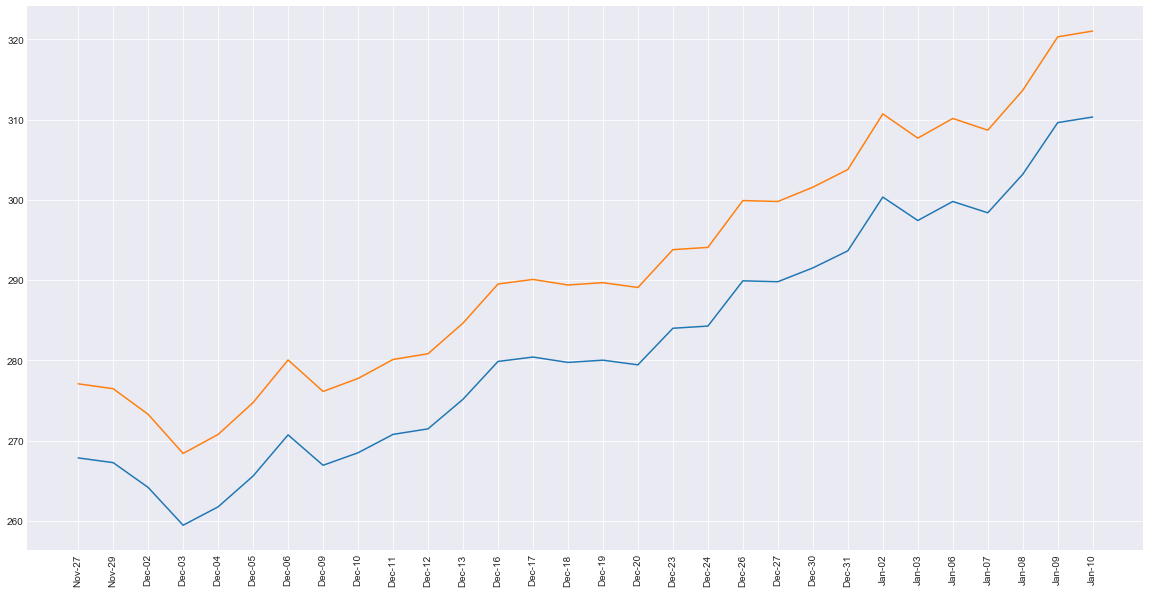

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
 
plt.rc('figure', figsize=(20, 10))
# create a color palette
#plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()
x = new_df.index
labels=x.strftime("%b-%d")
ax.plot(x.strftime("%b-%d"), new_df['Adj Close']);
ax.plot(x.strftime("%b-%d"), new_df['Prediction']); 
plt.xticks(x.strftime("%b-%d"), labels, rotation='vertical')